In [116]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

from itertools import islice 
import random as random


# Load World Indicators CSV
with open ('/Users/danny_delatorre/Desktop/Data Bootcamp/Project Work/Project 1/Indicators.csv') as world_indicators:

# Read World Indicators File and store into Pandas data frame
    world_indicators = pd.read_csv('/Users/danny_delatorre/Desktop/Data Bootcamp/Project Work/Project 1/Indicators.csv')
    

In [117]:
# Load Athlete Events CSV
with open ('/Users/danny_delatorre/Desktop/Data Bootcamp/Project Work/Project 1/athlete_events.csv') as athlete_events:

# Read Purchasing File and store into Pandas data frame
    athlete_events = pd.read_csv('/Users/danny_delatorre/Desktop/Data Bootcamp/Project Work/Project 1/athlete_events.csv')
    

In [118]:
# Test to see if Indicators.csv loads properly. 
world_indicators_data = pd.DataFrame(world_indicators)
world_indicators_data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [119]:
# Test to see if athlete_events.csv loads properly.  
athlete_event_data = pd.DataFrame(athlete_events)
athlete_event_data.head(2)



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [120]:
# How many unique countries are in the indicators.csv dataset?

unique_items = world_indicators["CountryCode"].nunique()
world_indicators_df = pd.DataFrame({"Unique Codes":[unique_items]})

world_indicators_df


,Unique Codes
0,247


In [121]:
# Create a dataframe that displays # of unique items in each keys column we will use as data in athlete_events.csv 
# *allows us to better visualize the data we are working with*

unique_items = athlete_events["Team"].nunique()
noc_count = athlete_events["NOC"].nunique()
total_athletes = athlete_events["Name"].nunique()
year = athlete_events["Year"].nunique()

athlete_events_df = pd.DataFrame({"Unique Teams":[unique_items],
                                   "Total Athletes":[total_athletes],
                                   "# of Events":[year],
                                  "noc": [noc_count]})

athlete_events_df


,Unique Teams,Total Athletes,# of Events,noc
0,1184,134732,35,230


In [122]:
W_I_GDP = world_indicators_data['IndicatorName'] == 'GDP per capita (current US$)'

W_I_GDP.to_frame()
W_I_GDP.reset_index()


,index,IndicatorName
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
5656453,5656453,False
5656454,5656454,False
5656455,5656455,False
5656456,5656456,False


In [123]:
columns = ['CountryCode', 'IndicatorName','Year', 'Value']


W_I_GDP = world_indicators_data.loc[world_indicators_data['IndicatorName'] == 'GDP per capita (current US$)', columns]


W_I_GDP.sort_values(by=['Value'], ascending=True)



,CountryCode,IndicatorName,Year,Value
61022,GNQ,GDP per capita (current US$),1962,35.367727
192832,RWA,GDP per capita (current US$),1966,37.518172
18362,RWA,GDP per capita (current US$),1960,40.566936
13832,LSO,GDP per capita (current US$),1960,40.614868
44289,RWA,GDP per capita (current US$),1961,40.719730
...,...,...,...,...
4777679,MCO,GDP per capita (current US$),2009,152877.365748
5129098,LIE,GDP per capita (current US$),2011,157092.969387
5141770,MCO,GDP per capita (current US$),2011,163351.646686
4418637,MCO,GDP per capita (current US$),2007,170472.284881


In [124]:
group_gdp_df = W_I_GDP.groupby('CountryCode').mean()
group_gdp_df = group_gdp_df['Value']

# set to data frame 
group_gdp_df.to_frame()
group_gdp_df.reset_index()


,CountryCode,Value
0,ABW,21496.381489
1,ADO,19981.425118
2,AFG,253.948534
3,AGO,1736.088672
4,ALB,1893.266623
...,...,...
234,YEM,738.636427
235,ZAF,3016.261470
236,ZAR,292.211040
237,ZMB,583.761921


In [125]:
# new data frame from 1992 - 2014 (22 years)

W_I_GDP = W_I_GDP[W_I_GDP.Year >= 1992]
W_I_GDP.reset_index()

,index,CountryCode,IndicatorName,Year,Value
0,2113983,ARB,GDP per capita (current US$),1992,2012.983558
1,2114350,CSS,GDP per capita (current US$),1992,2820.808555
2,2114724,CEB,GDP per capita (current US$),1992,2347.355796
3,2115104,EAS,GDP per capita (current US$),1992,3100.630022
4,2115573,EAP,GDP per capita (current US$),1992,494.792768
...,...,...,...,...,...
5202,5638656,VUT,GDP per capita (current US$),2014,3147.963779
5203,5639393,VNM,GDP per capita (current US$),2014,2052.294202
5204,5639947,WBG,GDP per capita (current US$),2014,2965.903675
5205,5640713,ZMB,GDP per capita (current US$),2014,1721.623274


In [126]:
# code to better visualize our min, max, Q1, Q2, and Q3 in respect to a country's overall 'GDP per capita (current US$)' using a datafram

quartiles = W_I_GDP['Value'].quantile([.3333, .5, .6666])

lower_q = quartiles[.3333]
median = quartiles[0.5]
upper_q = quartiles[0.6666]

IQR = (upper_q - lower_q)

min_GDP = W_I_GDP['Value'].min() 
max_GDP = W_I_GDP['Value'].max() 

quartiles_df = pd.DataFrame({"Min":[min_GDP],
                                   "Q1":[lower_q],
                                   "Q2":[median],
                                  "Q3": [upper_q],
                             "Max": [max_GDP],
                           "IQR": [IQR]})

quartiles_df

,Min,Q1,Q2,Q3,Max,IQR
0,64.810154,1419.030623,3182.767874,7039.718635,193648.132213,5620.688012


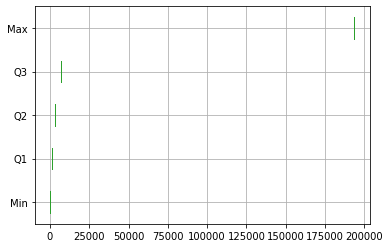

In [127]:
# create Box Plot using data set 

boxplot = pd.DataFrame({"Min":[min_GDP], "Q1":[lower_q], "Q2":[median], "Q3": [upper_q], "Max": [max_GDP]})
boxplot.boxplot(vert=False)


In [160]:
value_column = W_I_GDP['Value']

# NUMBER OF VALUES WE HAVE TO WORK WITH IN THE SET 
values_count = len (value_column)
each_third = values_count / 3

rounded_down = each_third - 1
final_round = round(rounded_down)

final_round



1735

In [161]:
# 1st third dataframe
length_to_split = [1735, 1735, 1735] 

inputt = iter(value_column)

outputt = [list(islice(inputt, elem)) 
            for elem in length_to_split] 

outputt
#group_gdp_df.to_frame()
#group_gdp_df.reset_index()


[[2012.98355787441,
  2820.8085553216497,
  2347.35579625339,
  3100.6300219092604,
  494.792768476695,
  21448.2798265666,
  11511.573780518702,
  1524.68914684478,
  17841.515720752,
  541.1479398368531,
  325.390068177907,
  18217.365461768,
  5409.5355148975705,
  22009.263243253707,
  2930.0947873443797,
  2487.23794993766,
  257.340275854873,
  735.056738231167,
  240.30491648561002,
  460.100280048113,
  2222.01899649926,
  779.449808692699,
  25013.406866732003,
  19553.2845713319,
  1633.5747069997,
  1600.6162724631,
  1952.6469080775894,
  328.660868986747,
  570.674392978727,
  570.13252948595,
  1109.36241238545,
  4647.85948020039,
  218.49216590263302,
  1766.0659189259195,
  20541.7738959473,
  479.728722331337,
  6680.37587040015,
  6798.02716671068,
  368.9168367933929,
  18591.2205236257,
  24820.2278258852,
  676.15151145252,
  11682.1288603818,
  9088.63129038702,
  285.69780982501,
  7464.22359869405,
  1666.2275129415698,
  23497.749615111206,
  2666.922731560689

In [155]:
# 3 lists 
low = random.sample(outputt[0], 10)
low

[16752.2771329379,
 8027.631130964829,
 173.06350217351002,
 3956.8049147419397,
 2283.1905722438,
 217.482759355715,
 23625.5289969556,
 17400.338874611498,
 422.7745515260071,
 2093.56473156851]

In [156]:
medium = random.sample(outputt[1], 10)
medium

[44158.040255446795,
 23721.1562800587,
 16275.1804236433,
 12323.138195649099,
 26731.1371367759,
 464.83516924819196,
 27405.0345758398,
 4117.308853330071,
 3702.931263125,
 34075.978949411096]

In [159]:
high = random.sample(outputt[2], 10)
high

[3665.3988130897997,
 40876.515267704,
 46679.26543223031,
 5517.7795692315685,
 7590.01644054361,
 59593.684798238886,
 1866.7072455097696,
 3919.97547381061,
 1678.8519884121201,
 469.792303889824]

In [168]:
country_code_column = W_I_GDP['CountryCode']

country_code_column.to_frame()

country_code_column.reset_index()



,index,CountryCode
0,2113983,ARB
1,2114350,CSS
2,2114724,CEB
3,2115104,EAS
4,2115573,EAP
...,...,...
5202,5638656,VUT
5203,5639393,VNM
5204,5639947,WBG
5205,5640713,ZMB
